Mounted at /content/drive
Found 296 stock images.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━

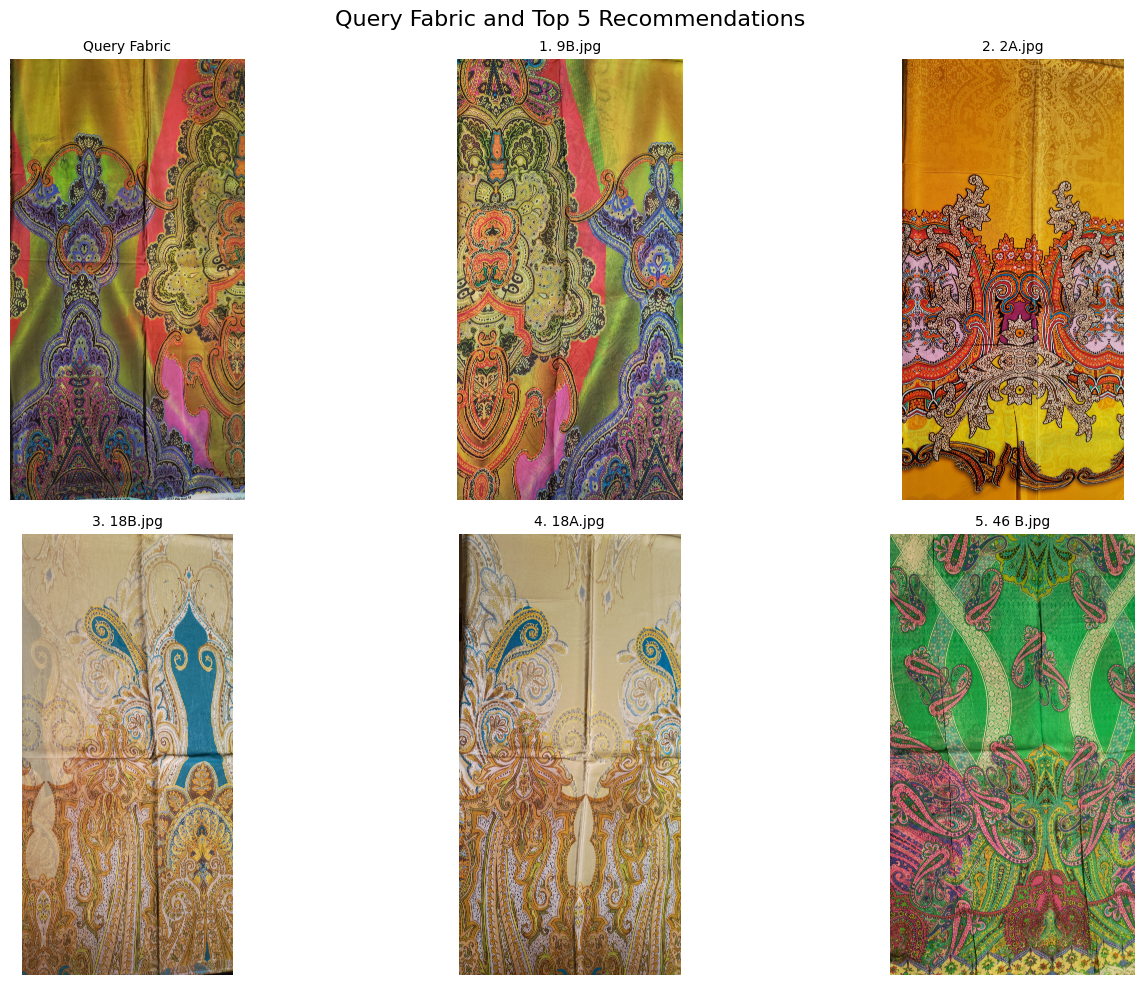

Query Fabric: 9A.jpg
Top 5 Recommended Fabrics:
1. 9B.jpg
2. 2A.jpg
3. 18B.jpg
4. 18A.jpg
5. 46 B.jpg


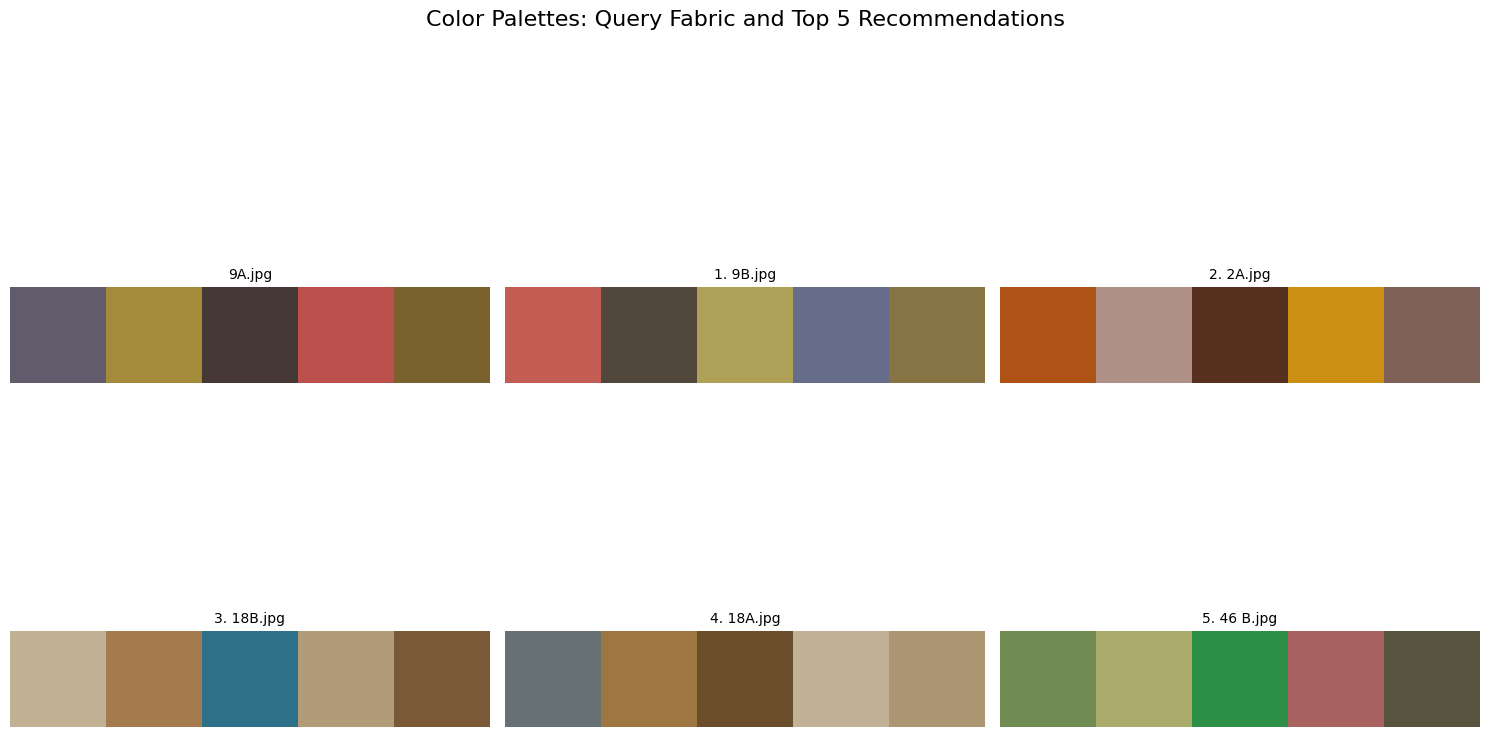

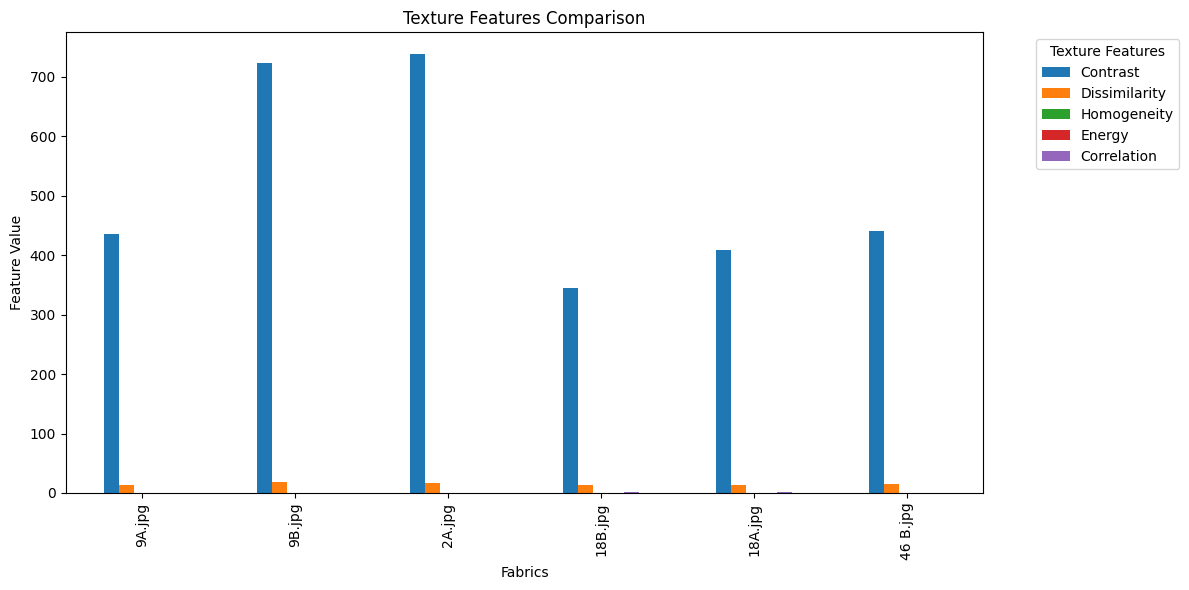

In [1]:
# Advanced Silk Fabric Recommender System: Step-by-Step Guide

# Step 1: Import Libraries and Mount Google Drive
# Description: Import necessary Python libraries and connect to Google Drive to access fabric images.

import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import drive
import cv2
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.cluster import KMeans
from skimage.feature import graycomatrix, graycoprops
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define Folder Paths and List Images
# Description: Set the path to the folder containing stock fabric images and list all image files.

# Define folder path for stock images
stock_folder_path = '/content/drive/MyDrive/Office stock/Silk/Silk_In_Stock'

# List all image files in the stock folder
stock_image_files = [f for f in os.listdir(stock_folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

print(f"Found {len(stock_image_files)} stock images.")

# Step 3: Create the SilkFabricRecommender Class
# Description: Define a class that encapsulates methods for image processing, feature extraction, and analysis.

class SilkFabricRecommender:
    def __init__(self):
        # Initialize ResNet50 model for feature extraction
        self.model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
        # Dictionaries to store fabric features, colors, and textures
        self.fabric_features = {}
        self.fabric_colors = {}
        self.fabric_textures = {}
        # StandardScaler for normalizing features
        self.scaler = StandardScaler()

    def load_and_preprocess_image(self, img_path):
        # Load and preprocess image for ResNet50 and other analyses
        img = Image.open(img_path).convert('RGB').resize((224, 224))
        img_array = np.array(img)
        img_array_resnet = preprocess_input(np.expand_dims(img_array, axis=0))
        return img_array, img_array_resnet

    def extract_features(self, img_array):
        # Extract features using ResNet50
        features = self.model.predict(img_array)
        return features.flatten()

    def analyze_color(self, img_array, n_colors=5):
        # Analyze dominant colors using K-means clustering
        pixels = img_array.reshape(-1, 3)
        kmeans = KMeans(n_clusters=n_colors, n_init=10)
        kmeans.fit(pixels)
        colors = kmeans.cluster_centers_
        return colors.astype(int)

    def analyze_texture(self, img_array):
        # Analyze texture using Gray Level Co-occurrence Matrix (GLCM)
        gray = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
        glcm = graycomatrix(gray, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], symmetric=True, normed=True)
        contrast = graycoprops(glcm, 'contrast').mean()
        dissimilarity = graycoprops(glcm, 'dissimilarity').mean()
        homogeneity = graycoprops(glcm, 'homogeneity').mean()
        energy = graycoprops(glcm, 'energy').mean()
        correlation = graycoprops(glcm, 'correlation').mean()
        return np.array([contrast, dissimilarity, homogeneity, energy, correlation])

# Step 4: Process Images and Extract Features
# Description: Load images, extract features, and analyze color and texture for all stock fabrics.

def process_images_from_drive(recommender, folder_path, image_files):
    for img_name in image_files:
        img_path = os.path.join(folder_path, img_name)
        img_array, img_array_resnet = recommender.load_and_preprocess_image(img_path)

        # Extract and store features, colors, and textures
        recommender.fabric_features[img_name] = recommender.extract_features(img_array_resnet)
        recommender.fabric_colors[img_name] = recommender.analyze_color(img_array)
        recommender.fabric_textures[img_name] = recommender.analyze_texture(img_array)

    print(f"Processed {len(image_files)} images.")

    # Normalize features
    features_matrix = np.array(list(recommender.fabric_features.values()))
    recommender.scaler.fit(features_matrix)

# Step 5: Implement Recommendation Algorithm
# Description: Define a function to find similar fabrics based on features, colors, and textures.

def get_recommendations(recommender, query_fabric, top_n=5):
    query_features = recommender.fabric_features[query_fabric]
    query_colors = recommender.fabric_colors[query_fabric]
    query_texture = recommender.fabric_textures[query_fabric]

    similarities = {}
    for fabric, features in recommender.fabric_features.items():
        if fabric != query_fabric:
            # Calculate similarity scores for features, colors, and textures
            feature_sim = cosine_similarity(query_features.reshape(1, -1),
                                            features.reshape(1, -1))[0][0]
            color_sim = cosine_similarity(query_colors.reshape(1, -1),
                                          recommender.fabric_colors[fabric].reshape(1, -1))[0][0]
            texture_sim = cosine_similarity(query_texture.reshape(1, -1),
                                            recommender.fabric_textures[fabric].reshape(1, -1))[0][0]

            # Combine similarity scores with weights
            total_sim = 0.5 * feature_sim + 0.3 * color_sim + 0.2 * texture_sim
            similarities[fabric] = total_sim

    # Return top N similar fabrics
    return sorted(similarities, key=similarities.get, reverse=True)[:top_n]

# Step 6: Visualize Recommendations
# Description: Create functions to display recommended fabrics, color palettes, and texture features.

def display_fabric_recommendations(folder_path, query_fabric, recommended_fabrics):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle(f"Query Fabric and Top 5 Recommendations", fontsize=16)

    # Display query fabric
    query_img = Image.open(os.path.join(folder_path, query_fabric)).convert('RGB')
    axes[0, 0].imshow(query_img)
    axes[0, 0].set_title("Query Fabric", fontsize=10)
    axes[0, 0].axis('off')

    # Display recommended fabrics
    for i, fabric_name in enumerate(recommended_fabrics):
        row = (i + 1) // 3
        col = (i + 1) % 3
        img_path = os.path.join(folder_path, fabric_name)
        img = Image.open(img_path).convert('RGB')
        axes[row, col].imshow(img)
        axes[row, col].set_title(f"{i+1}. {fabric_name}", fontsize=10)
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

def display_color_palettes(recommender, query_fabric, recommended_fabrics):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle(f"Color Palettes: Query Fabric and Top 5 Recommendations", fontsize=16)

    fabrics = [query_fabric] + recommended_fabrics

    for i, fabric in enumerate(fabrics):
        row = i // 3
        col = i % 3
        colors = recommender.fabric_colors[fabric] / 255.0  # Normalize to [0, 1]
        axes[row, col].imshow([colors])
        axes[row, col].set_title(fabric if i == 0 else f"{i}. {fabric}", fontsize=10)
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

def display_texture_features(recommender, query_fabric, recommended_fabrics):
    fabrics = [query_fabric] + recommended_fabrics
    texture_features = ['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation']

    data = []
    for fabric in fabrics:
        data.append(recommender.fabric_textures[fabric])

    df = pd.DataFrame(data, columns=texture_features, index=fabrics)

    plt.figure(figsize=(12, 6))
    df.plot(kind='bar', ax=plt.gca())
    plt.title("Texture Features Comparison")
    plt.xlabel("Fabrics")
    plt.ylabel("Feature Value")
    plt.legend(title="Texture Features", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Step 7: Run the Recommender System
# Description: Create an instance of the recommender, process images, and generate recommendations.

# Create and initialize the recommender
recommender = SilkFabricRecommender()

# Process stock images
process_images_from_drive(recommender, stock_folder_path, stock_image_files)

# Choose a random fabric as the query fabric
import random
query_fabric = random.choice(stock_image_files)

# Get recommendations
recommended_fabrics = get_recommendations(recommender, query_fabric)

# Display the fabric recommendations
display_fabric_recommendations(stock_folder_path, query_fabric, recommended_fabrics)

# Print additional information
print(f"Query Fabric: {query_fabric}")
print("Top 5 Recommended Fabrics:")
for i, fabric in enumerate(recommended_fabrics, 1):
    print(f"{i}. {fabric}")

# Display color palettes
display_color_palettes(recommender, query_fabric, recommended_fabrics)

# Display texture features
display_texture_features(recommender, query_fabric, recommended_fabrics)